### Genre Exploration

In [2]:
# dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#import csv's
data_parq = Path("Resources/mo_movies_data.parquet")

data_df = pd.read_parquet(data_parq)

In [4]:
data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0
...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0


In [5]:
data_df["ROI$"] = (data_df['Revenue'] - data_df['Budget'])
data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0,-3396594.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0,-74010360.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0,-7873775.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0,82944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0,111451538.0
...,...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0,215063.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0,7000000.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0,528612.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0,-731207.0


In [9]:
# set display to 2 decimal instead of scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

In [10]:
# here's the entire list of genres to pull from:
unique = list(data_df["Genre"].unique())

genre_set = set()
for genres in unique:
    split = genres.replace(" ", "").split(",")
    genre_set.update(split)

#len(genre_set)

genre_count = {k:[data_df[data_df["Genre"].str.contains(k)]["Title"].count(),\
                 data_df[data_df["Genre"].str.contains(k)]["Revenue"].sum(),\
                 data_df[data_df["Genre"].str.contains(k)]["Budget"].sum(),\
                 data_df[data_df["Genre"].str.contains(k)]["ROI$"].sum()] for k in genre_set}
genre_count_df = pd.DataFrame(genre_count).T.rename(columns ={0:"Genre Count", 1:"Total Revenue", 2:"Total Budget", 3:"Return on Investment"})
genre_count_df

,Genre Count,Total Revenue,Total Budget,Return on Investment
Western,9,710558240,191730000,518828240
Action,675,116701735028,42435936638,74265798390
Adventure,486,129820038026,41519950639,88300087387
Mystery,249,17035741487,6239863837,10795877650
War,46,1729194863,1085900000,643294863
History,86,4121842213,2144011888,1977830325
Comedy,859,83943140339,28711334545,55231805794
Music,85,5129804117,1835934442,3293869675
Sport,45,2279436935,1124427704,1155009231
Biography,165,10596635741,4228203293,6368432448


In [12]:
genre_count_df.sort_values(["Return on Investment"], ascending=False)

,Genre Count,Total Revenue,Total Budget,Return on Investment
Adventure,486,129820038026,41519950639,88300087387
Action,675,116701735028,42435936638,74265798390
Comedy,859,83943140339,28711334545,55231805794
Drama,1225,73957193133,30514492261,43442700872
Sci-Fi,191,43902239574,14032010288,29870229286
Animation,141,38341964609,11561227737,26780736872
Thriller,387,35815338529,12263095242,23552243287
Fantasy,185,33605612095,11211596621,22394015474
Romance,395,23817499004,9156074714,14661424290
Family,136,22498973591,8080635400,14418338191


In [43]:
genre_total_revenue = {k:data_df[data_df["Genre"].str.contains(k)]["Revenue"].sum() for k in genre_set}

#genre_total_revenue = pd.DataFrame.from_dict(genre_total_revenue,orient="index")
genre_total_revenue_df = pd.DataFrame( list(genre_total_revenue.items()), columns=["Genre", "Total Revenue"] )

genre_total_revenue_df

,Genre,Total Revenue
0,Western,710558240
1,Action,116701735028
2,Adventure,129820038026
3,Mystery,17035741487
4,War,1729194863
5,History,4121842213
6,Comedy,83943140339
7,Music,5129804117
8,Sport,2279436935
9,Biography,10596635741


In [14]:
genre_budget = {k:data_df[data_df["Genre"].str.contains(k)]["Budget"].sum() for k in genre_set}
genre_budget

{'Western': 191730000,
 'Action': 42435936638,
 'Adventure': 41519950639,
 'Mystery': 6239863837,
 'War': 1085900000,
 'History': 2144011888,
 'Comedy': 28711334545,
 'Music': 1835934442,
 'Sport': 1124427704,
 'Biography': 4228203293,
 'Sci-Fi': 14032010288,
 'Musical': 644240000,
 'Animation': 11561227737,
 'Fantasy': 11211596621,
 'Thriller': 12263095242,
 'Horror': 3998989335,
 'Family': 8080635400,
 'Crime': 11844484650,
 'Documentary': 165168148,
 'Drama': 30514492261,
 'Romance': 9156074714}

In [15]:
genre_roi = {k:data_df[data_df["Genre"].str.contains(k)]["ROI$"].sum() for k in genre_set}
genre_roi

{'Western': 518828240.0,
 'Action': 74265798390.0,
 'Adventure': 88300087387.0,
 'Mystery': 10795877650.0,
 'War': 643294863.0,
 'History': 1977830325.0,
 'Comedy': 55231805794.0,
 'Music': 3293869675.0,
 'Sport': 1155009231.0,
 'Biography': 6368432448.0,
 'Sci-Fi': 29870229286.0,
 'Musical': 1264620269.0,
 'Animation': 26780736872.0,
 'Fantasy': 22394015474.0,
 'Thriller': 23552243287.0,
 'Horror': 9197175255.0,
 'Family': 14418338191.0,
 'Crime': 14218934436.0,
 'Documentary': 620518818.0,
 'Drama': 43442700872.0,
 'Romance': 14661424290.0}

Code and notes

In [17]:
# # use str.contains() function to get genres - create action genre df
# crime_movies = data_df[data_df["Genre"].str.contains("Crime")]
# action_movies = data_df[data_df["Genre"].str.contains("Action")]
# comedy_movies = data_df[data_df["Genre"].str.contains("Comedy")]
# adventure_movies = data_df[data_df["Genre"].str.contains("Adventure")]
# thriller_movies = data_df[data_df["Genre"].str.contains("Thriller")]
# romance_movies = data_df[data_df["Genre"].str.contains("Romance")]
# drama_movies = data_df[data_df["Genre"].str.contains("Drama")]
# scifi_movies = data_df[data_df["Genre"].str.contains("Sci-Fi")]
# animation_movies = data_df[data_df["Genre"].str.contains("Animation")]
# horror_movies = data_df[data_df["Genre"].str.contains("Horror")]
# fantasy_movies = data_df[data_df["Genre"].str.contains("Fantasy")]
# documentary_movies = data_df[data_df["Genre"].str.contains("Documentary")]
# western_movies = data_df[data_df["Genre"].str.contains("Western")]

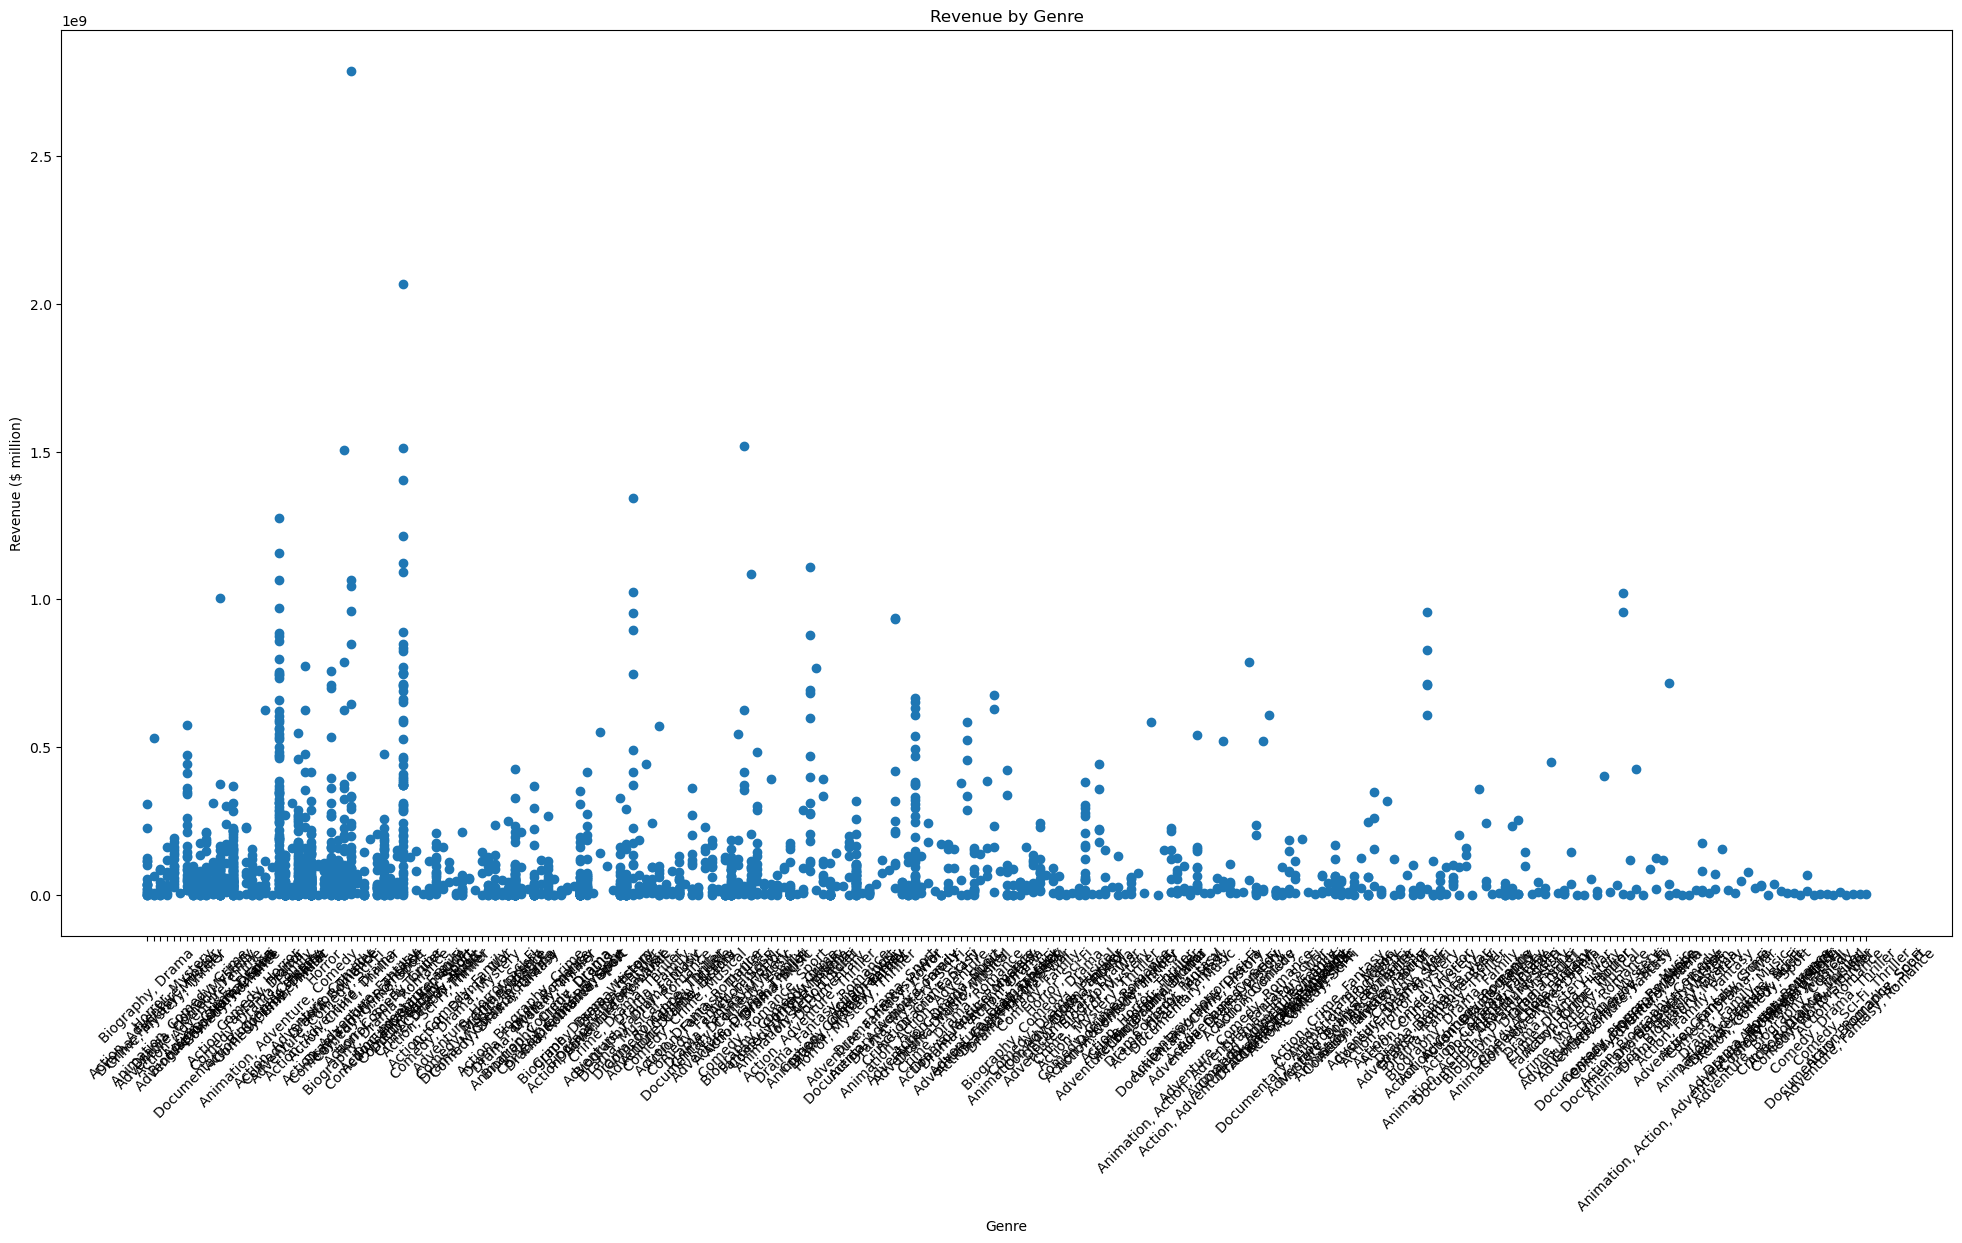

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(data_df['Genre'], data_df['Revenue'])
plt.xlabel('Genre')
plt.ylabel('Revenue ($ million)')
plt.title('Revenue by Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(horror_movies['Genre'], horror_movies['Revenue'])
plt.xlabel('Horror Genre')
plt.ylabel('Revenue ($ million)')
plt.title('Revenue by Horror Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

NameError: name 'horror_movies' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(comedy_movies['Genre'], comedy_movies['Revenue'])
plt.xlabel('Comedy Genre')
plt.ylabel('Revenue ($ million)')
plt.title('Revenue by Comedy Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(scifi_movies['Genre'], scifi_movies['Revenue'])
plt.xlabel('Sci-Fi Genre')
plt.ylabel('Revenue ($ million)')
plt.title('Revenue by Sci-Fi Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(drama_movies['Genre'], drama_movies['Revenue'])
plt.xlabel('Dram Genre')
plt.ylabel('Revenue ($ million)')
plt.title('Revenue by Drama Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Below, I tried to use a for loop for creating each genre df for us. It was annoying and complicated,
# then i found the str.contains() function with is very simple. So I'd recommend using that to create genre df's for 
# each genre you want to explore

In [ ]:
# # use loop for creating genres dictionary?
# genre_df = {}

# # Create a DataFrame for each year
# for genre in data_df['Genre']:
#     genre_df = data_df[data_df['Genre'].isin([genre])]
#     genre_dataframes[genre] = genre_df

# # Access the DataFrame for a specific year
# genre_action_df = genre_dataframes.get(Action)

In [ ]:
# https://stackoverflow.com/questions/19169649/how-to-use-str-contains-with-multiple-expressions-in-pandas-dataframes

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html#pandas.DataFrame.isin

In [ ]:
# https://www.geeksforgeeks.org/difference-between-list-vs-set-vs-tuple-in-python/

In [ ]:
# tried using is but had errors. str.contains() worked better
# action_df = data_df[data_df["Action"].isin["Genre"]]
# action_df